# CS-5820-100 - Artificial Intelligence <br>
# Credit Risk Evaluation using Machine learning <br>

By
Surya Vaddhiparthy <br>

Under the guidance of<br>
Professor Dr. Guan Yue Hong<br>


## Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler

## Loading the data


The data is a real-world data from a credit provider “homecredit.net” shared in a Kaggle Competition into local python data frame. <br>
**Source URL:** https://www.kaggle.com/competitions/home-credit-default-risk

In [2]:
df = pd.read_csv (r'/Users/surya/Downloads/application_train.csv')

## Exploratory Data Analysis

In [3]:
#First few rows of data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Size of the data -
print( "The data has",df.shape[0],"rows and",df.shape[1]," columns")

The data has 307511 rows and 122  columns


In [5]:
# Viewing a sample of column names to understand the dataset
df= df.rename(columns=str.lower) # changing column names to lower case
df.columns

Index(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity',
       ...
       'flag_document_18', 'flag_document_19', 'flag_document_20',
       'flag_document_21', 'amt_req_credit_bureau_hour',
       'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
       'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
       'amt_req_credit_bureau_year'],
      dtype='object', length=122)

In [6]:
# To enable printing of information of all columns
pd.set_option('display.max_rows', None)

In [7]:
#Names of columns and their data types
df.dtypes

sk_id_curr                        int64
target                            int64
name_contract_type               object
code_gender                      object
flag_own_car                     object
flag_own_realty                  object
cnt_children                      int64
amt_income_total                float64
amt_credit                      float64
amt_annuity                     float64
amt_goods_price                 float64
name_type_suite                  object
name_income_type                 object
name_education_type              object
name_family_status               object
name_housing_type                object
region_population_relative      float64
days_birth                        int64
days_employed                     int64
days_registration               float64
days_id_publish                   int64
own_car_age                     float64
flag_mobil                        int64
flag_emp_phone                    int64
flag_work_phone                   int64


## Summary Statistics

Understanding the TARGET variable values:<br>
The data frame has a target variable

In [8]:
df.target.unique()

array([1, 0])

In [9]:
# Summary statistics of all the 122 columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sk_id_curr,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
target,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
cnt_children,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
amt_income_total,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
amt_credit,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
amt_annuity,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
amt_goods_price,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
region_population_relative,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
days_birth,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
days_employed,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


### Checking values for selected categorical variables like housetype_mode,occupation_type, organization_type

In [10]:
df['housetype_mode'].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: housetype_mode, dtype: int64

In [11]:
df['occupation_type'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: occupation_type, dtype: int64

In [12]:
df['organization_type'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

# Data Wrangling

## Missing values

In [13]:
df_missing=df.isna().sum()
df_missing.sort_values(ascending=False)

commonarea_medi                 214865
commonarea_avg                  214865
commonarea_mode                 214865
nonlivingapartments_mode        213514
nonlivingapartments_avg         213514
nonlivingapartments_medi        213514
fondkapremont_mode              210295
livingapartments_mode           210199
livingapartments_avg            210199
livingapartments_medi           210199
floorsmin_avg                   208642
floorsmin_mode                  208642
floorsmin_medi                  208642
years_build_medi                204488
years_build_mode                204488
years_build_avg                 204488
own_car_age                     202929
landarea_medi                   182590
landarea_mode                   182590
landarea_avg                    182590
basementarea_medi               179943
basementarea_avg                179943
basementarea_mode               179943
ext_source_1                    173378
nonlivingarea_mode              169682
nonlivingarea_avg        

###  Dropping variables with more than 100,000 missing values

In [14]:
df=df[df_missing[df_missing<100000].index]
df.isna().sum().sort_values(ascending=False)

occupation_type                96391
ext_source_3                   60965
amt_req_credit_bureau_year     41519
amt_req_credit_bureau_qrt      41519
amt_req_credit_bureau_mon      41519
amt_req_credit_bureau_week     41519
amt_req_credit_bureau_day      41519
amt_req_credit_bureau_hour     41519
name_type_suite                 1292
obs_30_cnt_social_circle        1021
def_30_cnt_social_circle        1021
obs_60_cnt_social_circle        1021
def_60_cnt_social_circle        1021
ext_source_2                     660
amt_goods_price                  278
amt_annuity                       12
cnt_fam_members                    2
days_last_phone_change             1
flag_document_17                   0
flag_document_18                   0
flag_document_21                   0
flag_document_20                   0
flag_document_19                   0
flag_document_2                    0
flag_document_3                    0
flag_document_4                    0
flag_document_5                    0
f

In [15]:
#Isolating features with missing values and displaying the first ten rows to understand them further.
df_missing2=df.isnull().any()
dfm=df[df_missing2[df_missing2==True].index]
dfm.head(10)

,amt_annuity,amt_goods_price,name_type_suite,occupation_type,cnt_fam_members,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,24700.5,351000.0,Unaccompanied,Laborers,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,Core staff,2.0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,Laborers,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,Laborers,2.0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,Core staff,1.0,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,27517.5,454500.0,"Spouse, partner",Laborers,2.0,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,41301.0,1395000.0,Unaccompanied,Accountants,3.0,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,42075.0,1530000.0,Unaccompanied,Managers,2.0,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,33826.5,913500.0,Children,NaN,2.0,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,20250.0,405000.0,Unaccompanied,Laborers,1.0,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN


Dealing with features of string data type with missing values

In [16]:
df[['occupation_type']]=df[['occupation_type']].fillna(value='Unknown')
# Checking number of applicants in each occupation type
df['occupation_type'].value_counts()


Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: occupation_type, dtype: int64

In [17]:
df['name_type_suite'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: name_type_suite, dtype: int64

In [18]:
#Filling the missing values for 'name_type_suite' with most frequent value for that column
df[['name_type_suite']]=df[['name_type_suite']].fillna(df['name_type_suite'].value_counts().index[0])
# Checking number of applicants in each occupation type after imputation of missing values with frequently used value "Unaccompanied"
df['name_type_suite'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: name_type_suite, dtype: int64

In [19]:
#Dealing with missing numerical data by filling with 0
df.fillna(value=0,inplace=True,axis=1)

In [20]:
df.isnull().any()

sk_id_curr                     False
target                         False
name_contract_type             False
code_gender                    False
flag_own_car                   False
flag_own_realty                False
cnt_children                   False
amt_income_total               False
amt_credit                     False
amt_annuity                    False
amt_goods_price                False
name_type_suite                False
name_income_type               False
name_education_type            False
name_family_status             False
name_housing_type              False
region_population_relative     False
days_birth                     False
days_employed                  False
days_registration              False
days_id_publish                False
flag_mobil                     False
flag_emp_phone                 False
flag_work_phone                False
flag_cont_mobile               False
flag_phone                     False
flag_email                     False
o

### Identifying Outliers

In [21]:
def get_outliers(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = get_outliers(df)
outliers.count().sort_values(ascending=False)

/var/folders/dk/yzp83lsn7zd1pc6qnwmy5z1r0000gn/T/ipykernel_18168/235234946.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


region_rating_client           80527
region_rating_client_w_city    78027
days_employed                  72217
reg_city_not_work_city         70867
flag_work_phone                61308
flag_emp_phone                 55386
live_city_not_work_city        55215
amt_req_credit_bureau_qrt      50575
amt_req_credit_bureau_mon      43759
def_30_cnt_social_circle       35166
flag_document_6                27078
def_60_cnt_social_circle       25769
flag_document_8                25024
target                         24825
reg_city_not_live_city         24039
obs_30_cnt_social_circle       19971
obs_60_cnt_social_circle       19564
flag_email                     17442
reg_region_not_work_region     15612
amt_goods_price                14728
amt_income_total               14035
live_region_not_work_region    12503
amt_req_credit_bureau_week      8536
region_population_relative      8412
amt_annuity                     7504
amt_credit                      6562
reg_region_not_live_region      4657
f

## Data visualization

Which gender borrowed the highest?

Text(0.5, 1.0, 'Gender distribution of applicants')

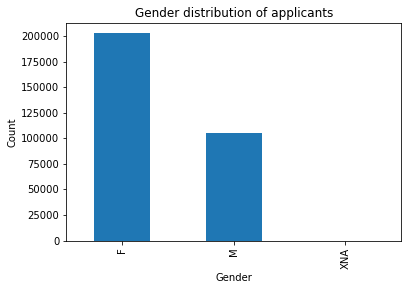

In [22]:
df['code_gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title('Gender distribution of applicants')

Distribution of target variable. In this case, the target variable would be a credit default indicator.<br>
1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample<br>
0 - all other cases

What is the proportion of borrowers that defaulted ?

Text(0.5, 1.0, 'Proportion of borrowers that defaulted')

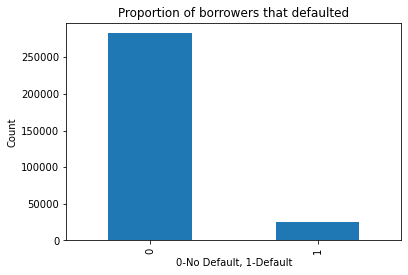

In [23]:
df['target'].value_counts().plot(kind='bar')
plt.xlabel("0-No Default, 1-Default")
plt.ylabel("Count")
plt.title('Proportion of borrowers that defaulted')

Who was accompanying client when he/she were applying for the loan?

Text(0.5, 1.0, 'Who was accompanying client when he/she were applying for the loan?')

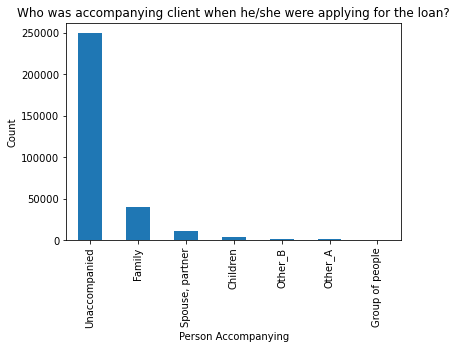

In [24]:
df['name_type_suite'].value_counts().plot(kind='bar')
plt.xlabel("Person Accompanying")
plt.ylabel("Count")
plt.title('Who was accompanying client when he/she were applying for the loan?')

What is the family status of the client?

Text(0.5, 1.0, 'What is the family status of the client?')

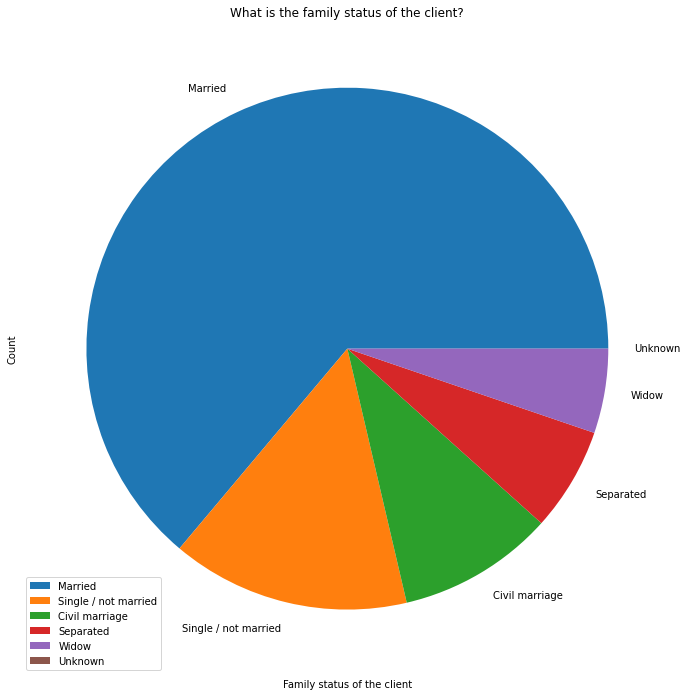

In [25]:
df['name_family_status'].value_counts().plot(kind='pie',legend=True,figsize=(12,12))
plt.xlabel("Family status of the client")
plt.ylabel("Count")
plt.title('What is the family status of the client?')

What is the distribution of type of organization where client works ?

Text(0.5, 1.0, 'What is the distribution of type of organization where client works ?')

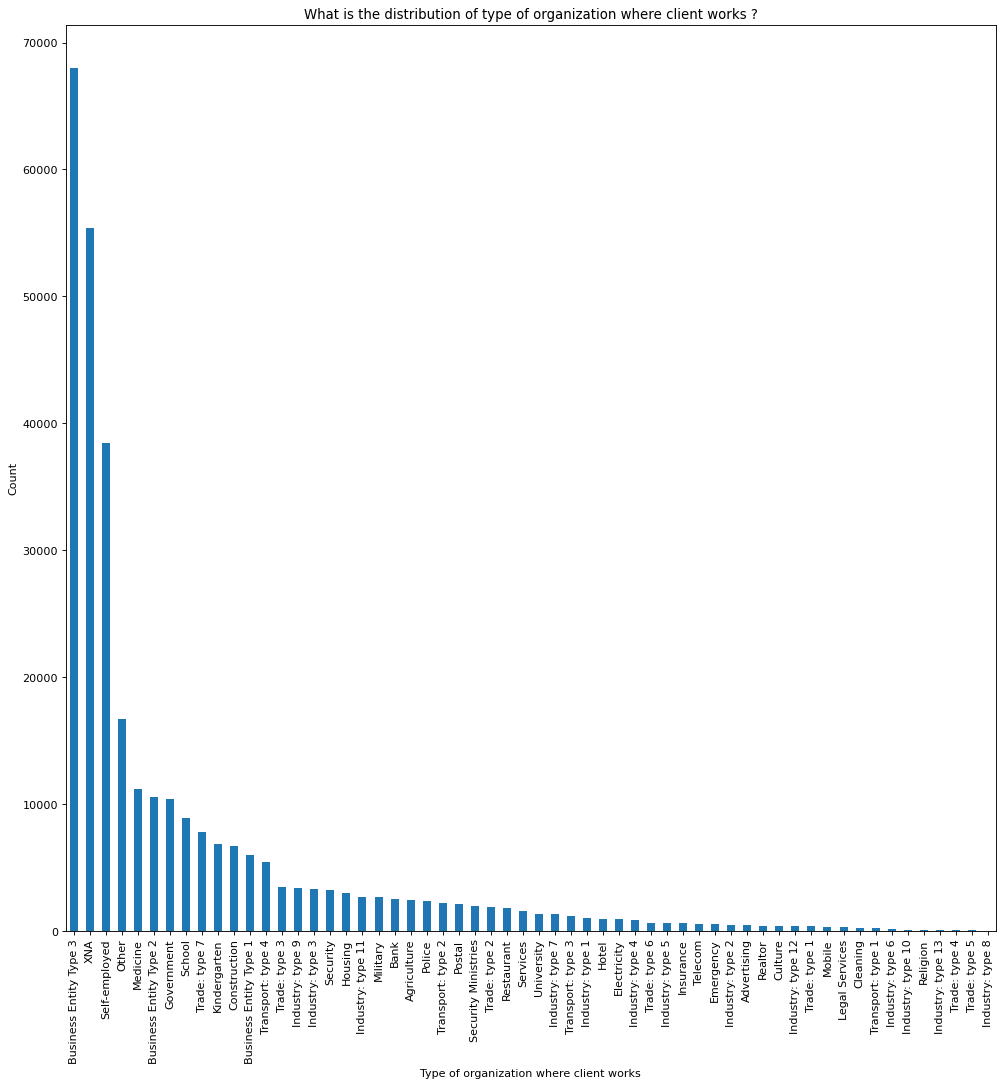

In [26]:
figure(figsize=(15,15), dpi=80)
df['organization_type'].value_counts().plot(kind='bar')
plt.xlabel("Type of organization where client works")
plt.ylabel("Count")
plt.title('What is the distribution of type of organization where client works ?')

Text(0.5, 1.0, 'Genderwise distribution of loan default ?')

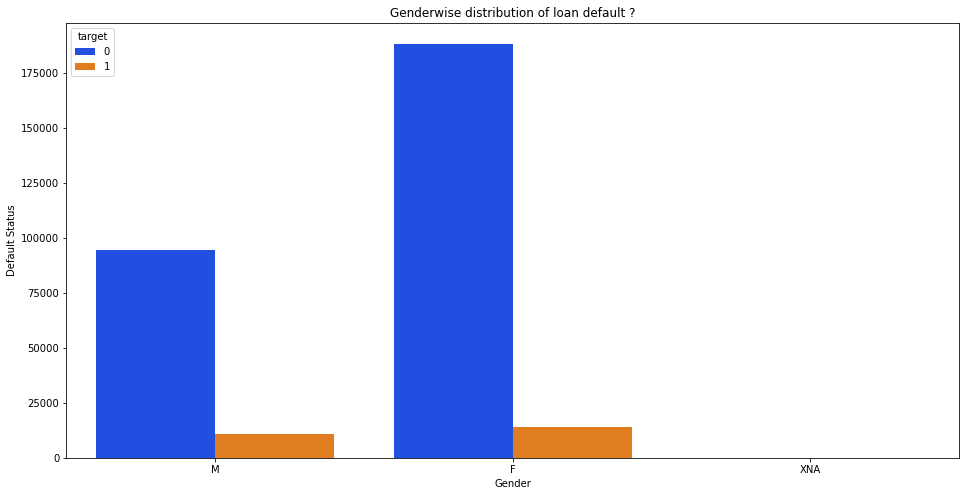

In [27]:
fig,ax = plt.subplots(figsize = (16,8))
sns.countplot(x='code_gender',data=df,hue='target',palette=sns.color_palette("bright"))
plt.xticks
plt.xlabel("Gender")
plt.ylabel("Default Status")
plt.title('Genderwise distribution of loan default ?')

In [28]:
df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Distribution of client income')

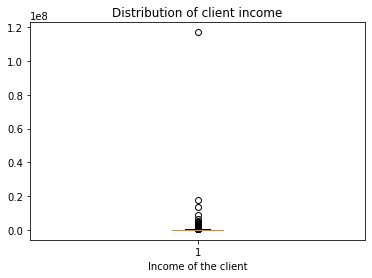

In [29]:
plt.boxplot(df['amt_income_total'])
plt.xlabel("Income of the client")
plt.title('Distribution of client income')

In [30]:
#Getting rid of extreme values that may affect the data
df=df[df['amt_income_total']<30000000]

Text(0.5, 1.0, 'Distribution of client income after removal of outliers')

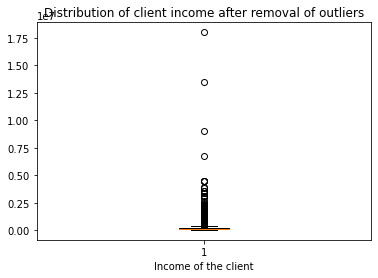

In [31]:
plt.boxplot(df['amt_income_total'])
plt.xlabel("Income of the client")
plt.title('Distribution of client income after removal of outliers')

Text(0.5, 1.0, 'Scatter plot of Credit Amount vs Income ')

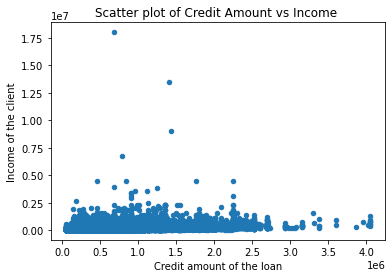

In [32]:
df.plot(kind='scatter',x='amt_credit',y='amt_income_total')
plt.xlabel("Credit amount of the loan")
plt.ylabel("Income of the client")
plt.title('Scatter plot of Credit Amount vs Income ')

# Feature Engineering

In [33]:
df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
cor=df.corr()
cor_outcome = abs(cor["target"])

In [35]:
#Identifying features that have higher correlation
abv01_corr_outcome = cor_outcome[cor_outcome>0.01] 
abv01_corr_outcome

target                         1.000000
cnt_children                   0.019179
amt_income_total               0.020460
amt_credit                     0.030369
amt_annuity                    0.012794
amt_goods_price                0.039564
region_population_relative     0.037220
days_birth                     0.078232
days_employed                  0.044927
days_registration              0.041981
days_id_publish                0.051463
flag_emp_phone                 0.045978
flag_work_phone                0.028530
flag_phone                     0.023800
region_rating_client           0.058901
region_rating_client_w_city    0.060894
hour_appr_process_start        0.024173
reg_city_not_live_city         0.044399
reg_city_not_work_city         0.051001
live_city_not_work_city        0.032524
ext_source_2                   0.159011
ext_source_3                   0.119564
def_30_cnt_social_circle       0.032398
def_60_cnt_social_circle       0.031404
days_last_phone_change         0.055206


In [36]:
# Selecting features with correlation above 0.01 and dropping features that are less correlated with the target variable
df_01=df[abv01_corr_outcome.index]
df_01.head()

,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,...,ext_source_2,ext_source_3,def_30_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_3,flag_document_6,flag_document_13,flag_document_16,amt_req_credit_bureau_mon
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.262949,0.139376,2.0,2.0,-1134.0,1,0,0,0,0.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0.622246,0.000000,0.0,0.0,-828.0,1,0,0,0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0.555912,0.729567,0.0,0.0,-815.0,0,0,0,0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0.650442,0.000000,0.0,0.0,-617.0,1,0,0,0,0.0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0.322738,0.000000,0.0,0.0,-1106.0,0,0,0,0,0.0


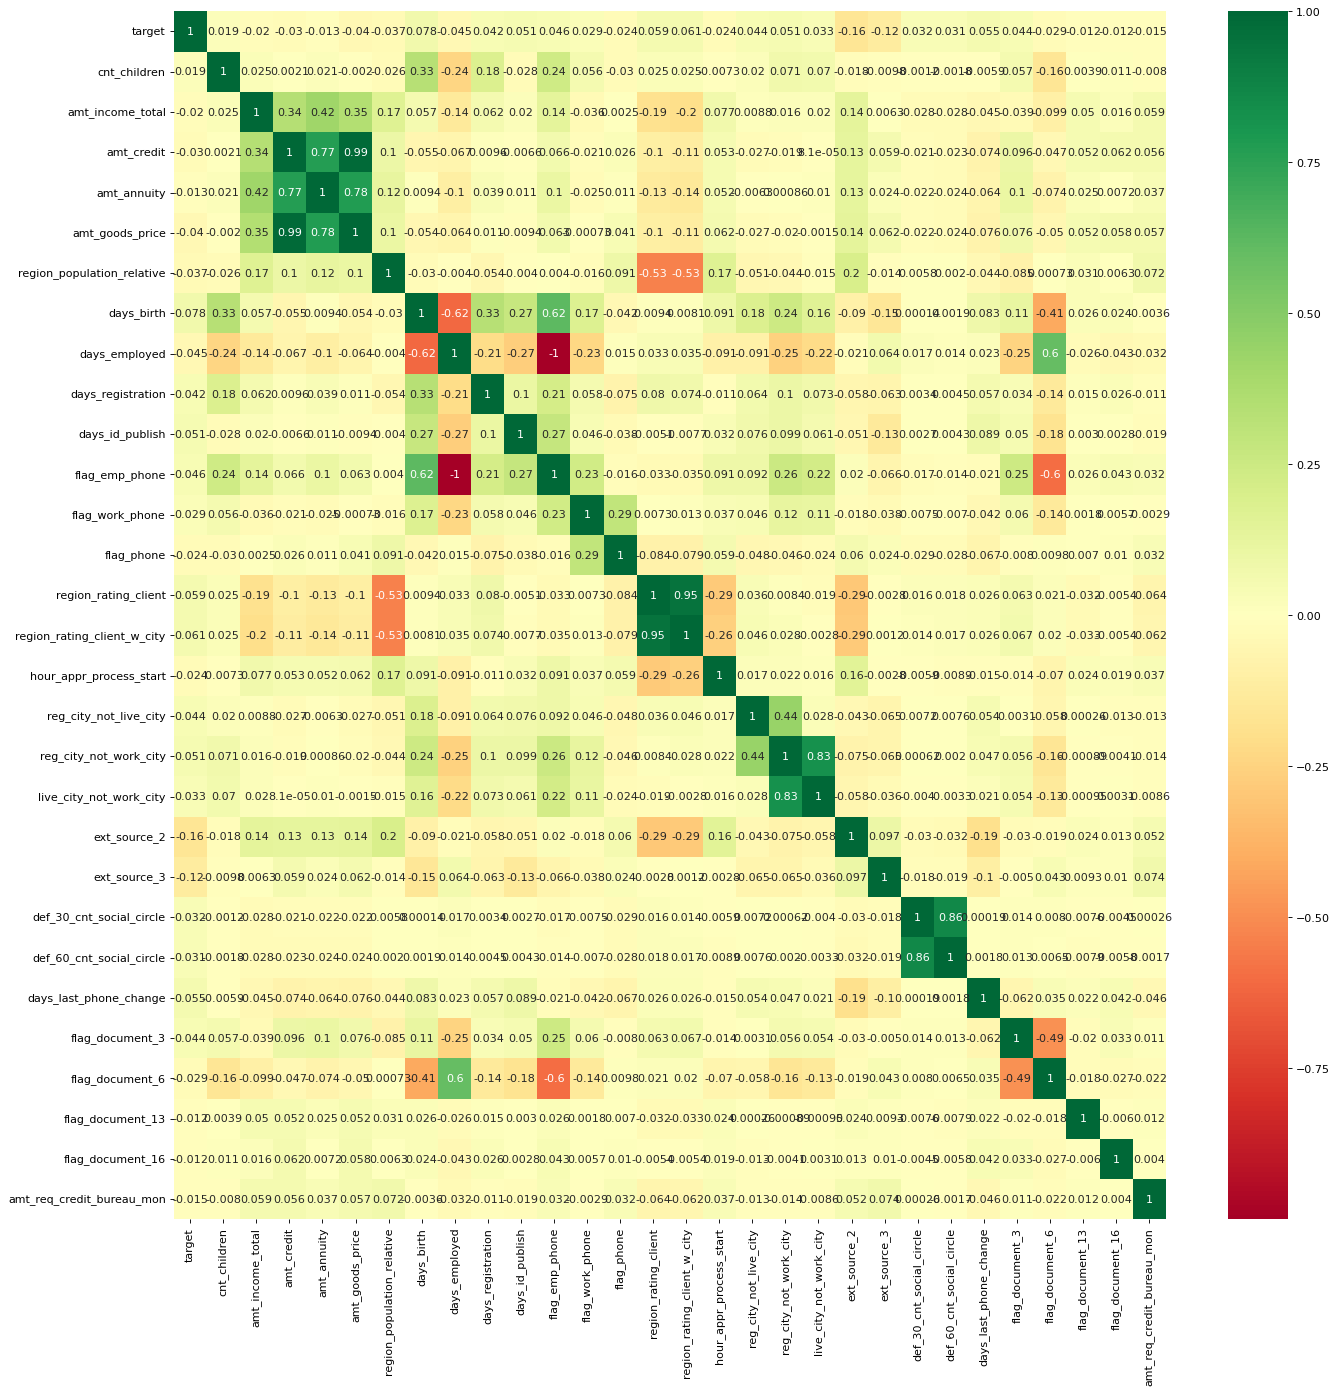

In [37]:

# plotting correlation heatmap
figure(figsize=(20,20), dpi=80)
dataplot = sns.heatmap(df_01.corr(), cmap="RdYlGn", annot=True)
  
# displaying heatmap
plt.show()

We do not need to perform any encoding as all the variables in the selected data after the feature engineering step are of numerical data type.

In [38]:
df_01.dtypes

target                           int64
cnt_children                     int64
amt_income_total               float64
amt_credit                     float64
amt_annuity                    float64
amt_goods_price                float64
region_population_relative     float64
days_birth                       int64
days_employed                    int64
days_registration              float64
days_id_publish                  int64
flag_emp_phone                   int64
flag_work_phone                  int64
flag_phone                       int64
region_rating_client             int64
region_rating_client_w_city      int64
hour_appr_process_start          int64
reg_city_not_live_city           int64
reg_city_not_work_city           int64
live_city_not_work_city          int64
ext_source_2                   float64
ext_source_3                   float64
def_30_cnt_social_circle       float64
def_60_cnt_social_circle       float64
days_last_phone_change         float64
flag_document_3          

Scaling any variables as necessary. Verifying if any encoding is required
for categorical variables.

In [39]:
df_01.describe().T['mean']

target                              0.080726
cnt_children                        0.417050
amt_income_total               168417.992784
amt_credit                     599026.118515
amt_annuity                     27107.519021
amt_goods_price                537909.750893
region_population_relative          0.020868
days_birth                     -16037.006195
days_employed                   63815.256424
days_registration               -4986.114553
days_id_publish                 -2994.200263
flag_emp_phone                      0.819889
flag_work_phone                     0.199369
flag_phone                          0.281067
region_rating_client                2.052463
region_rating_client_w_city         2.031521
hour_appr_process_start            12.063413
reg_city_not_live_city              0.078173
reg_city_not_work_city              0.230454
live_city_not_work_city             0.179555
ext_source_2                        0.513290
ext_source_3                        0.409576
def_30_cnt

# Separating predictors and target variables

In [40]:
y_df=df_01['target']
X_df= df_01.drop('target', axis=1)

# Machine Learning Algorithms to predict the credit default indicator

In [41]:
# Initializing an empty disctionary to track accuracy
accuracy={}

## Model 1. Logistic Regression (Baseline)

In [42]:
# Splitting the data
from sklearn.model_selection import train_test_split
X1train, X1test, y1train, y1test = train_test_split(X_df, y_df, test_size = 0.2)

#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1train = sc.fit_transform(X1train)
X1test = sc.transform(X1test)

In [43]:

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(multi_class='ovr', random_state = 0) 
model3.fit(X1train, y1train)
ypred = model3.predict(X1test)
# Model Evaluation
m3_train=model3.score(X1train, y1train) 
m3_test=model3.score(X1test, y1test)

print("For the model:", model3, ", the training accuracy is",m3_train,"and the test accracy is",m3_test)

cm1 = confusion_matrix(y1test, ypred) 
print(cm1)
cr1 = classification_report(y1test, ypred) 
print(cr1)

For the model: LogisticRegression(multi_class='ovr', random_state=0) , the training accuracy is 0.9191774251243862 and the test accracy is 0.9194985528925889
[[56551     5]
 [ 4946     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56556
           1       0.00      0.00      0.00      4946

    accuracy                           0.92     61502
   macro avg       0.46      0.50      0.48     61502
weighted avg       0.85      0.92      0.88     61502



## Model 2. Stochastic Gradient Descent 

In [44]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=1000, tol=0.01,loss='log_loss')
print(sgdc)
xtrain, xtest, ytrain, ytest = train_test_split(X_df, y_df, test_size = 0.15)
sgdc.fit(xtrain, ytrain)
sgdc.fit(xtrain, ytrain)
score = sgdc.score(xtrain, ytrain)
print("The training score for SGDC-SMOTE is ", score)
ypred = sgdc.predict(xtest)
cm2 = confusion_matrix(ytest, ypred) 
print(cm2)
cr2 = classification_report(ytest, ypred) 
print(cr2)

SGDClassifier(loss='log_loss', tol=0.01)
The training score for SGDC-SMOTE is  0.9126416025525761
[[42115   335]
 [ 3644    33]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     42450
           1       0.09      0.01      0.02      3677

    accuracy                           0.91     46127
   macro avg       0.51      0.50      0.49     46127
weighted avg       0.85      0.91      0.88     46127



## Model 3.Extreme Gradient Boosting (XGBoost) <br>
(without use of Synthetic Minority Over Sampling Technique to fix class imbalance)

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
xtrain, xtest, ytrain, ytest=train_test_split(X_df, y_df, test_size=0.15) 
xgbc = XGBClassifier(eval_metric='logloss')
print(xgbc)
xgbc.fit(xtrain, ytrain)
# - cross validataion
scores = cross_val_score(xgbc, xtrain, ytrain, cv=5) 
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, xtrain, ytrain, cv=kfold ) 
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
ypred = xgbc.predict(xtest)
cm4 = confusion_matrix(ytest,ypred)
print(cm4)
cr4 = classification_report(ytest, ypred) 
print(cr4)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
Mean cross-validation score: 0.92
K-fold CV average score: 0.92
[[42328    87]
 [ 3636    76]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42415
           1       0.47      0.02      

##  Class Imbalance Problem

In [46]:
count=Counter(y_df)
Counter(y_df)

Counter({1: 24824, 0: 282686})

Text(0.5, 1.0, 'Distribution of target variable (Loan default predictor)')

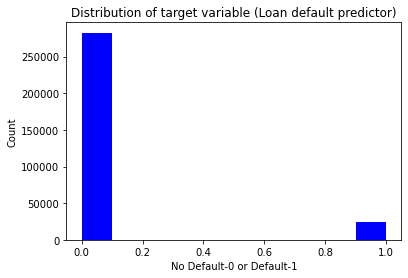

In [47]:
df_01.hist(column='target', grid=False, color='#0000FF')
plt.xlabel("No Default-0 or Default-1")
plt.ylabel("Count")
plt.title('Distribution of target variable (Loan default predictor)')

In [48]:
print("The target value 1-The client with payment difficulties is just",round((count[1]/count[0])*100,2),"% of total dataset and hence this is class imbalance problem.")

The target value 1-The client with payment difficulties is just 8.78 % of total dataset and hence this is class imbalance problem.


### SMOTE - Synthetic Minority Over Sampling Technique

In [49]:
sample_technique=SMOTE()
X, y = sample_technique.fit_resample(X_df, y_df) 
Counter(y)

Counter({1: 282686, 0: 282686})

In [50]:
y_df.head()

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Text(0.5, 1.0, 'Distribution of target variable (Loan default predictor)')

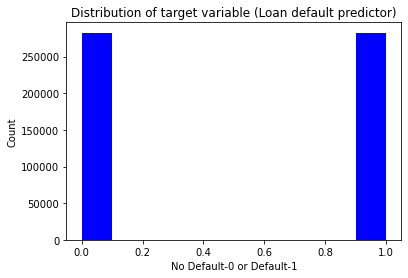

In [51]:
y.hist( grid=False, color='#0000FF')
plt.xlabel("No Default-0 or Default-1")
plt.ylabel("Count")
plt.title('Distribution of target variable (Loan default predictor)')

## Model 4. Stochastic Gradient Descent after fixing the class imbalance problem 

In [52]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=1000, tol=0.01,loss='log_loss')
print(sgdc)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.15)
sgdc.fit(xtrain, ytrain)
score = sgdc.score(xtrain, ytrain)
print("The training score for SGDC-SMOTE is ", score)
ypred = sgdc.predict(xtest)
cm3 = confusion_matrix(ytest, ypred) 
print(cm3)
cr3 = classification_report(ytest, ypred) 
print(cr3)

SGDClassifier(loss='log_loss', tol=0.01)
The training score for SGDC-SMOTE is  0.5000645072685126
[[   58 42146]
 [   15 42587]]
              precision    recall  f1-score   support

           0       0.79      0.00      0.00     42204
           1       0.50      1.00      0.67     42602

    accuracy                           0.50     84806
   macro avg       0.65      0.50      0.34     84806
weighted avg       0.65      0.50      0.34     84806



## Model 5. Extreme Gradient Boosting (XGBoost)

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15) 
xgbc = XGBClassifier(eval_metric='logloss')
print(xgbc)
xgbc.fit(xtrain, ytrain)
# - cross validataion
scores = cross_val_score(xgbc, xtrain, ytrain, cv=5) 
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, xtrain, ytrain, cv=kfold ) 
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
ypred = xgbc.predict(xtest)
cm4 = confusion_matrix(ytest,ypred)
print(cm4)
cr4 = classification_report(ytest, ypred) 
print(cr4)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
Mean cross-validation score: 0.95
K-fold CV average score: 0.95
[[41833   515]
 [ 4122 38336]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     42348
           1       0.99      0.90      

## Model 6. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15) 
rfc = RandomForestClassifier(n_estimators=50)
print(rfc)
rfc.fit(xtrain, ytrain)
# - cross validataion
scores = cross_val_score(rfc, xtrain, ytrain, cv=5) 
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True) 
kf_cv_scores = cross_val_score(rfc, xtrain, ytrain, cv=kfold ) 
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
ypred = rfc.predict(xtest)
cm5 = confusion_matrix(ytest,ypred)
print(cm5)
cr5 = classification_report(ytest, ypred) 
print(cr5)

RandomForestClassifier(n_estimators=50)
Mean cross-validation score: 0.91
K-fold CV average score: 0.92
[[40232  2308]
 [ 4569 37697]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     42540
           1       0.94      0.89      0.92     42266

    accuracy                           0.92     84806
   macro avg       0.92      0.92      0.92     84806
weighted avg       0.92      0.92      0.92     84806



## Conclusion <br>
After analyzing the performance of five different machine learning models, before and after resolving the class imbalance of the target variable. The best machine learning model to predict the minority class of the target variable which is used to identify applicants who can potentially default on their payments is the model generated with extreme gradient boosting algorithm after applying the synthetic minority oversampling technique (SMOTE).

## Future Scope

1.	Use of Adhoc data from bureau will further improvise the model
2.	A dynamic model based on geo-spatial information.
3.	Use of data scraped from bank statements.

## Challenges

1.	Simplicity sometimes is preferred over accuracy due to regulatory compliances that require the model predictions to be interpretable and attributable to a specific feature, this would result in choosing the interpretability of the model over accuracy.
2.	Privacy concerns related to gathering data for individuals with limited or no credit history where Adhoc data is used to assess the creditworthiness


# References

1. SMOTE-TOMEK Technique 
https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc 

2. SMOTE Technique 
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification

3. Project on “Insurance Management System” by Surya Vaddhiparthy
https://vaddhiparthy.com/ims/

4. Kaggle 
https://www.kaggle.com/competitions/home-credit-default-risk

5. One main Financial’s resources.
https://www.onemainfinancial.com/resources

6. GM Financial’s resources
https://www.gmfinancial.com/en-us/financial-resources.html

7. Dataset Source:
https://www.kaggle.com/competitions/home-credit-default-risk

